# 🇧🇪 Exploring data from the 2025 Belgian GP

The 2025 Belgian GP is the first live GP weekend since I started this project. And it's a tricky GP to have as the first one to analyze because it's not a regular F1 weekend: it's Sprint weekend. Check out [my blog post](https://www.aleaugustog.com/blog/0101-belgium-gp) where I dig more into the differences between regular F1 GPs and sprint F1 GPs.

## Getting the meeting key

In [3]:
import pandas as pd

meetings_df = pd.read_json('https://api.openf1.org/v1/meetings?year=2025&country_code=BEL')
meetings_df

,meeting_key,circuit_key,circuit_short_name,meeting_code,location,country_key,country_code,country_name,meeting_name,meeting_official_name,gmt_offset,date_start,year
0,1265,7,Spa-Francorchamps,BEL,Spa-Francorchamps,16,BEL,Belgium,Belgian Grand Prix,FORMULA 1 MOËT & CHANDON BELGIAN GRAND PRIX 2025,02:00:00,2025-07-25T10:30:00+00:00,2025


In [4]:
# Set the meeting_key to the first meeting in the DataFrame
meeting_key = meetings_df['meeting_key'].iloc[0]

## Listing the sessions in the meeting

In [5]:
sessions_df = pd.read_json(f'https://api.openf1.org/v1/sessions?meeting_key={meeting_key}')
sessions_df

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1265,9929,Spa-Francorchamps,2025-07-25T10:30:00+00:00,2025-07-25T11:30:00+00:00,Practice,Practice 1,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025
1,1265,9930,Spa-Francorchamps,2025-07-25T14:30:00+00:00,2025-07-25T15:14:00+00:00,Qualifying,Sprint Qualifying,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025
2,1265,9934,Spa-Francorchamps,2025-07-26T10:00:00+00:00,2025-07-26T11:00:00+00:00,Race,Sprint,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025
3,1265,9935,Spa-Francorchamps,2025-07-26T14:00:00+00:00,2025-07-26T15:00:00+00:00,Qualifying,Qualifying,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025
4,1265,9939,Spa-Francorchamps,2025-07-27T13:00:00+00:00,2025-07-27T15:00:00+00:00,Race,Race,16,BEL,Belgium,7,Spa-Francorchamps,02:00:00,2025


> By the time I'm doing this, only 3 sessions have taken place. The sprint race actually ended a few minutes ago.

## Looking at the free practice 1 (FP1) lap data

In [6]:
# Set the session_key to the first session in the DataFrame
session_key = sessions_df['session_key'].iloc[0]

laps_df = pd.read_json(f'https://api.openf1.org/v1/laps?session_key={session_key}')
laps_df.head()

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1265,9929,6,1,2025-07-25T10:30:08.787000+00:00,NaN,52.211,33.302,253.0,188.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2051, 2051, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 2051]",273.0
1,1265,9929,5,1,2025-07-25T10:30:10.880000+00:00,NaN,55.456,40.330,300.0,196.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",246.0
2,1265,9929,30,1,2025-07-25T10:30:16.349000+00:00,NaN,55.366,41.656,292.0,182.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",260.0
3,1265,9929,63,1,2025-07-25T10:30:17.849000+00:00,NaN,52.888,35.866,331.0,190.0,True,NaN,"[2064, 2064, 2051, 2051, 2051, 2051, 2051, 2051]","[2051, 2049, 2049, 2049, 2049, 2051, 2051, 205...","[2049, 2049, 2049, 2051, 2051, 2049, 2051]",290.0
4,1265,9929,12,1,2025-07-25T10:30:21.474000+00:00,NaN,59.603,36.603,276.0,192.0,True,NaN,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2051, 2049, 2049]",196.0


In [7]:
ld_stats = laps_df[laps_df['lap_duration'].notna()]['lap_duration'].describe()
ld_stats

count     417.000000
mean      179.467002
std       172.909066
min       102.022000
25%       107.259000
50%       120.188000
75%       162.707000
max      1628.146000
Name: lap_duration, dtype: float64

### Thoughs after reading these first basic stats

Some of these lap times are not good examples of race lap times, for example we can see: pit out laps, slow laps, errors in the data.

The lap time of 1,628.146 seconds (almost 1/2 hour) is clearly a mismeasurement. There is a required delta time that the drivers must meet, no one can just be driving around completing only 1 lap in 30 minutes (the driver would be flagged for dangerous driving 😅).

Looking at the other quartiles: I can see a lot of non-representative lap times. Let's take the 50th percentile for example: 120 seconds. In F1, the distances between lap times are measured in miliseconds (1000th of a second). It's all about precision. Something like 300ms slower than the fastest lap means being VERY slow. Being 1 second slower than the fastest lap is way beyond very slow; it's a silly amount of time. So, **the 120 seconds of the 50th percentile is not a race lap (18 seconds slower than the fastest lap)**.

For this reason, going forward I will only consider the lap times in the first quartile for lap time analysis.

In [8]:
# Filter out laps that are not representative
# e.g. pit out laps, slow laps, errors in the data
laps_df_filtered = laps_df[
    (laps_df['lap_duration'].notna())
    & (laps_df['is_pit_out_lap'] == False)
    & (laps_df['lap_duration'] <= ld_stats['25%'])
]
laps_df_filtered['lap_duration'].describe()

count    105.000000
mean     105.198876
std        1.385165
min      102.022000
25%      104.236000
50%      105.545000
75%      106.119000
max      107.259000
Name: lap_duration, dtype: float64

### Box plot to see lap time quartiles per driver

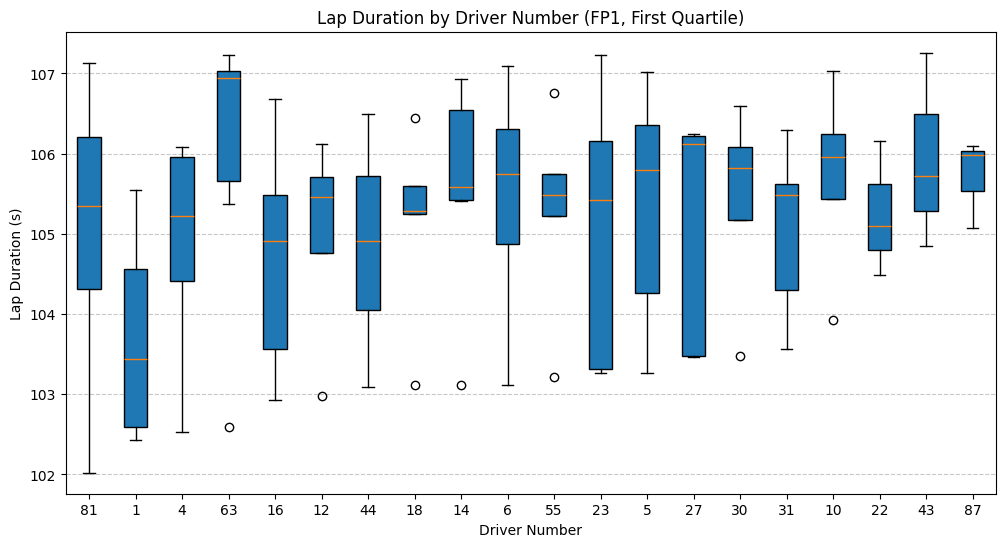

In [9]:
import matplotlib.pyplot as plt

# Prepare data for boxplot: group lap durations by driver_number
lap_data = [[dn, laps_df_filtered[laps_df_filtered['driver_number'] == dn]['lap_duration'].values]
                for dn in sorted(laps_df_filtered['driver_number'].unique())]

sorted_boxplot_data = sorted(lap_data, key=lambda x: x[1].min())
driver_numbers = [x[0] for x in sorted_boxplot_data]
boxplot_data = [x[1] for x in sorted_boxplot_data]

fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

ax.boxplot(boxplot_data, tick_labels=driver_numbers, zorder=3, patch_artist=True)
ax.set_xlabel('Driver Number')
ax.set_ylabel('Lap Duration (s)')
ax.set_title('Lap Duration by Driver Number (FP1, First Quartile)')

plt.show()

#### First observations

The X-axis of the boxplot is sorted by the minimum lap time set by each driver: the left most was the fastest in the session and the right-most was the slowest. This is how F1's officially presents the final timetable for the session.

The thing that first caught my eye was driver 63's box: he set the overall 4th fastest lap of the session. However, **that lap time was an outlier!** It's NOT AT ALL an overall representation of what he did during the session.

The next thing that I noticed is the Y-axis position of the boxes compared to each other. You can see for example that driver 1 was more on a "qualifying mode" than the rest, as his box is positioned towards the lower end of the Y-axis (faster lap times).

### Quartiles in tabular form:

I want to see the box plot information in tabular form, and also the number of laps each driver did.

In [10]:
def outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return list(data[(data < lower_bound) | (data > upper_bound)])

laps_df_filtered.groupby('driver_number').agg(
    count=('lap_duration', 'count'),
    min=('lap_duration', 'min'),
    mean=('lap_duration', 'mean'),
    max=('lap_duration', 'max'),
    q25=('lap_duration', lambda x: x.quantile(0.25)),
    median=('lap_duration', 'median'),
    q75=('lap_duration', lambda x: x.quantile(0.75)),
    low_outliers=('lap_duration', lambda x: outliers_iqr(x))) \
.sort_values(by='min')

,count,min,mean,max,q25,median,q75,low_outliers
driver_number,,,,,,,,
81,10,102.022,104.985000,107.129,104.31475,105.3435,106.20575,[]
1,4,102.426,103.715000,105.545,102.59625,103.4445,104.56325,[]
4,10,102.526,104.918000,106.082,104.41150,105.2220,105.96075,[]
63,8,102.598,106.119125,107.226,105.65950,106.9475,107.03150,[102.598]
16,7,102.928,104.659857,106.682,103.56000,104.9080,105.49050,[]
12,4,102.979,105.004000,106.118,104.75725,105.4595,105.70625,[102.979]
44,4,103.085,104.852250,106.493,104.04650,104.9155,105.72125,[]
18,5,103.112,105.135800,106.439,105.24600,105.2910,105.59100,"[106.439, 103.112]"
14,6,103.120,105.576833,106.932,105.42450,105.5845,106.54775,[103.12]


## Looking at the sprint race lap data

In [11]:
# Set the session_key to the third session in the DataFrame
session_key = sessions_df['session_key'].iloc[2]

laps_df = pd.read_json(f'https://api.openf1.org/v1/laps?session_key={session_key}')
laps_df.head()

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1265,9934,1,2,2025-07-26T10:05:40.549000+00:00,30.851,46.870,28.548,314.0,213,False,106.269,"[2049, 2051, 2049, 2048, 2048, 2048, 2048, 2048]","[2048, 2051, 2048, 2049, 2048, 2048, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2048, 2048, 2048]",313.0
1,1265,9934,81,2,2025-07-26T10:05:41.177000+00:00,30.509,47.141,28.534,330.0,209,False,106.184,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2048, 2048, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2048, 2048]",317.0
2,1265,9934,16,2,2025-07-26T10:05:41.986000+00:00,30.619,47.060,28.664,NaN,208,False,106.343,"[2051, 2049, 2048, 2048, 2048, 2048, 2048, 2048]","[2049, 2049, 2049, 2049, 2048, 2048, 2049, 205...","[2049, 2049, 2049, 2049, 2049, 2049, 2048, 2049]",313.0
3,1265,9934,4,2,2025-07-26T10:05:42.488000+00:00,30.731,47.204,28.589,335.0,213,False,106.524,"[2049, 2049, 2049, 2049, 2048, 2048, 2049, 2049]","[2049, 2049, 2049, 2049, 2048, 2051, 2051, 204...","[2051, 2048, 2048, 2049, 2048, 2048, 2048, 2051]",315.0
4,1265,9934,31,2,2025-07-26T10:05:43.409000+00:00,30.556,47.634,28.582,333.0,210,False,106.772,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2048, 2049, 2049, 204...","[2048, 2049, 2049, 2049, 2049, 2049, 2048, 2049]",318.0


In [12]:
laps_df['lap_duration'].describe()

count    277.000000
mean     107.539722
std        0.876815
min      105.914000
25%      107.125000
50%      107.584000
75%      107.944000
max      116.961000
Name: lap_duration, dtype: float64

There is [at least] one non-representive lap time because the max lap time is 116.961 seconds. I say is non-representative because there were no pit stops during this race, so there is no "normal" reason why there would be a lap time almost 10 seconds slower than the third quartile.

In reality, driver 10 had car issues, started the race 2 laps after the official start and drove around a few laps before retiring.

To remove this non-representative max lap time, I will filter out the lap data to consider only laps within the 99th percentile.

In [187]:
# Filter out laps that are not representative
# e.g. pit out laps, slow laps, errors in the data
laps_df_filtered = laps_df[
    (laps_df['lap_duration'].notna())
    & (laps_df['is_pit_out_lap'] == False)
    & (laps_df['lap_duration'] < laps_df['lap_duration'].quantile(0.99))
]
laps_df_filtered['lap_duration'].describe()

count    274.000000
mean     107.492547
std        0.653708
min      105.914000
25%      107.120500
50%      107.579500
75%      107.929250
max      108.942000
Name: lap_duration, dtype: float64

In [13]:
stats = laps_df.groupby('driver_number').agg(
    count=('lap_duration', 'count'),
    min=('lap_duration', 'min'),
    mean=('lap_duration', 'mean'),
    max=('lap_duration', 'max'),
    q25=('lap_duration', lambda x: x.quantile(0.25)),
    median=('lap_duration', 'median'),
    q75=('lap_duration', lambda x: x.quantile(0.75)),
    # low_outliers=('lap_duration', lambda x: outliers_iqr(x))
    ) \
.sort_values(by='q75')

# Add a column to stats equal to each row's q75 diff compared to the first row
stats['q75_diff'] = stats['q75'] - stats['q75'].iloc[0]
stats

,count,min,mean,max,q25,median,q75,q75_diff
driver_number,,,,,,,,
4,14,105.914,106.377857,106.735,106.17650,106.4345,106.53150,0.00000
81,14,106.061,106.425286,106.742,106.29175,106.4620,106.54875,0.01725
1,14,106.052,106.416214,106.707,106.29650,106.4150,106.56000,0.02850
16,14,106.343,107.037071,109.384,106.54850,106.7260,107.05625,0.52475
31,14,106.772,107.193500,107.541,107.06725,107.1775,107.31350,0.78200
55,14,106.770,107.226286,107.655,107.05225,107.2245,107.36975,0.83825
6,14,106.973,107.426500,108.031,107.28750,107.3760,107.56325,1.03175
87,14,107.038,107.437357,107.927,107.14900,107.5090,107.62075,1.08925
30,14,107.249,107.613357,108.221,107.48300,107.5745,107.66950,1.13800


## Qualifying Positions

In [215]:
session_key = sessions_df['session_key'].iloc[3]
results_df = pd.read_json(f'https://api.openf1.org/v1/session_result?session_key={session_key}').set_index('position')
results_df

,driver_number,number_of_laps,dnf,dns,dsq,duration,gap_to_leader,meeting_key,session_key
position,,,,,,,,,
1,4,20,False,False,False,"[101.01, 100.715, 100.562]","[0.0, 0.089, 0.0]",1265,9935
2,81,21,False,False,False,"[101.201, 100.626, 100.647]","[0.191, 0.0, 0.085]",1265,9935
3,16,18,False,False,False,"[101.635, 101.084, 100.9]","[0.625, 0.458, 0.338]",1265,9935
4,1,15,False,False,False,"[101.334, 100.951, 100.903]","[0.324, 0.325, 0.341]",1265,9935
5,23,20,False,False,False,"[101.772, 101.505, 101.201]","[0.762, 0.879, 0.639]",1265,9935
6,63,18,False,False,False,"[101.784, 101.254, 101.26]","[0.774, 0.628, 0.6980000000000001]",1265,9935
7,22,17,False,False,False,"[101.84, 101.245, 101.284]","[0.8300000000000001, 0.619, 0.722]",1265,9935
8,6,19,False,False,False,"[101.572, 101.281, 101.31]","[0.562, 0.655, 0.748]",1265,9935
9,30,20,False,False,False,"[101.748, 101.297, 101.328]","[0.738, 0.671, 0.766]",1265,9935
